In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv("Train.csv")

In [75]:
df.shape\\

(1600, 6)

In [76]:
x=df[['feature_1','feature_2','feature_3','feature_4','feature_5']]
y=df['target']
x.shape,y.shape

((1600, 5), (1600,))

In [79]:
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std
print(u.shape,std.shape)
x.head()

(5,) (5,)


,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.290165,-0.898712,-0.372381,0.441771,0.525024
1,-0.842705,-0.158229,-0.723656,-0.994642,0.598960
2,0.233004,0.157070,-0.102094,0.729947,-0.203782
3,0.171708,0.167210,-0.530576,-0.078377,-1.333037
4,-1.702188,0.558336,-2.723087,-0.633625,1.259339


In [81]:
ones=np.ones((x.shape[0],1))
x=np.hstack((ones,x))
x.shape,y.shape

((1600, 6), (1600,))

In [82]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def error(x,y,theta):
    e=0.0
    m=x.shape[0]
    y_=hypothesis(x,theta)
    e=np.sum((y-y_)**2)
    return e/m

def gradient(x,y,theta):
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y_-y))
    m=x.shape[0]
    return grad/m

def gradientdecent(x,y,learning_rate=0.1,step=300):
    n=x.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    for i in range(step):
        e=error(x,y,theta)
        error_list.append(e)
        grad=gradient(x,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list   

def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1-num/denom)
    return score*100

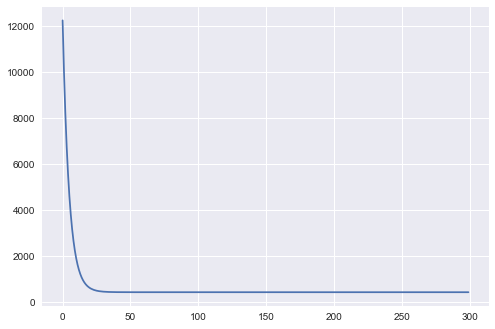

In [83]:
theta,error_list=gradientdecent(x,y)
theta
plt.plot(error_list)

In [89]:
y_=hypothesis(x,theta)
r2_score(y,y_)

96.60939669975616

In [88]:
x_test=pd.read_csv('Test.csv').values

ones  = np.ones((x_test.shape[0],1))
x_test=np.hstack((ones,x_test))


y_test=hypothesis(x_test,theta)
y_test.shape

(400,)

In [87]:
df=pd.DataFrame(data=y_test,columns=["target"])

df.insert(0, "Id",'1')
df['Id'] = np.arange(len(df))
df

df.to_csv('air_prediction.csv',index=False)